In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re
import string

import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [2]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [3]:
fake.shape

(23481, 4)

In [4]:
true.shape

(21417, 4)

In [5]:
fake['target'] = 'fake'
true['target'] = 'true'

In [6]:
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [7]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [8]:
data.head()

,title,text,subject,date,target
0,Factbox: Trump fills top jobs for his administ...,(Reuters) - President-elect Donald Trump has c...,politicsNews,"November 30, 2016",true
1,JUST IN: Donald Trump Seriously Thinks Deaf P...,As if Donald Trump hasn t angered enough peopl...,News,"October 14, 2016",fake
2,Russia investigating IS claim about Russian ho...,MOSCOW (Reuters) - Russia s foreign ministry s...,worldnews,"October 4, 2017",true
3,Americans Once Elected A President After He W...,After an awful campaign filled with hateful rh...,News,"November 29, 2017",fake
4,A divided Iraq tests U.S. influence as fight a...,WASHINGTON (Reuters) - After years of focusing...,worldnews,"October 17, 2017",true


In [9]:
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,Factbox: Trump fills top jobs for his administ...,(Reuters) - President-elect Donald Trump has c...,politicsNews,true
1,JUST IN: Donald Trump Seriously Thinks Deaf P...,As if Donald Trump hasn t angered enough peopl...,News,fake
2,Russia investigating IS claim about Russian ho...,MOSCOW (Reuters) - Russia s foreign ministry s...,worldnews,true
3,Americans Once Elected A President After He W...,After an awful campaign filled with hateful rh...,News,fake
4,A divided Iraq tests U.S. influence as fight a...,WASHINGTON (Reuters) - After years of focusing...,worldnews,true


In [10]:
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,(Reuters) - President-elect Donald Trump has c...,politicsNews,true
1,As if Donald Trump hasn t angered enough peopl...,News,fake
2,MOSCOW (Reuters) - Russia s foreign ministry s...,worldnews,true
3,After an awful campaign filled with hateful rh...,News,fake
4,WASHINGTON (Reuters) - After years of focusing...,worldnews,true


In [11]:
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,(reuters) - president-elect donald trump has c...,politicsNews,true
1,as if donald trump hasn t angered enough peopl...,News,fake
2,moscow (reuters) - russia s foreign ministry s...,worldnews,true
3,after an awful campaign filled with hateful rh...,News,fake
4,washington (reuters) - after years of focusing...,worldnews,true


In [12]:
import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [13]:
data.head()

,text,subject,target
0,reuters presidentelect donald trump has chose...,politicsNews,true
1,as if donald trump hasn t angered enough peopl...,News,fake
2,moscow reuters russia s foreign ministry said...,worldnews,true
3,after an awful campaign filled with hateful rh...,News,fake
4,washington reuters after years of focusing di...,worldnews,true


In [14]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to C:\Users\Andi
[nltk_data]     Azam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
data.head()

,text,subject,target
0,reuters presidentelect donald trump chosen for...,politicsNews,true
1,donald trump angered enough people already add...,News,fake
2,moscow reuters russia foreign ministry said we...,worldnews,true
3,awful campaign filled hateful rhetoric america...,News,fake
4,washington reuters years focusing divided iraq...,worldnews,true


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


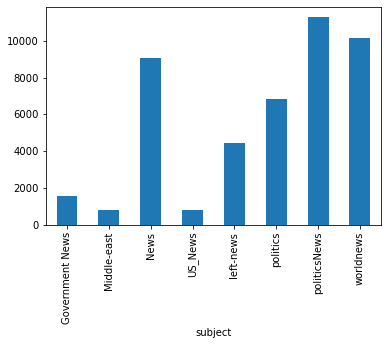

In [16]:
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


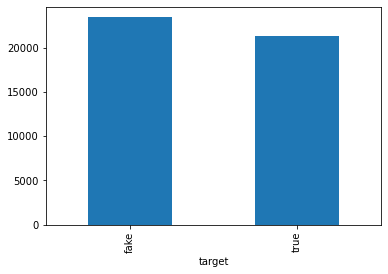

In [17]:
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

In [19]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

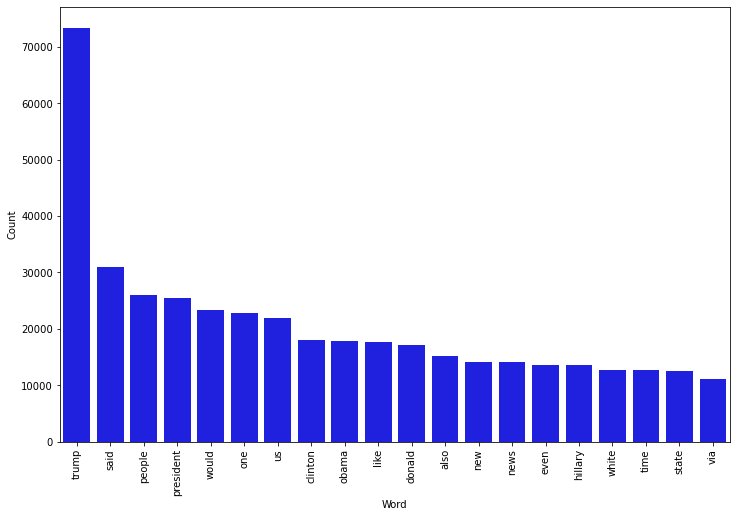

In [20]:
counter(data[data["target"] == "fake"], "text", 20)

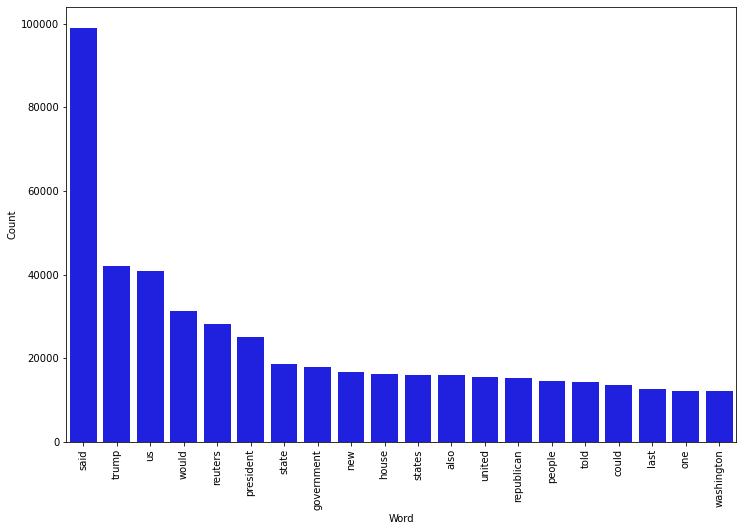

In [21]:
counter(data[data["target"] == "true"], "text", 20)

In [22]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [23]:
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

model = pipe.fit(X_train, y_train)

prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.95%


Confusion matrix, without normalization


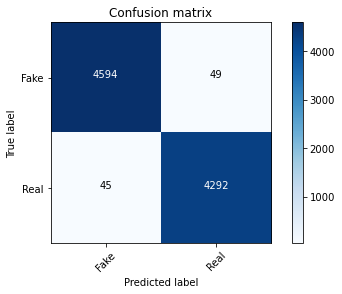

In [25]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])